In [317]:
from cProfile import label

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [318]:
csv_file = "jass_scrofaV5_vs_Mix_v2_data.csv"

# jass_scrofa_v1_data.csv
# jass_test_metrics.csv

In [319]:
df = pd.read_csv(csv_file, index_col=0)

In [320]:
# df = df.drop_duplicates()


In [321]:
df.reset_index(drop=True, inplace=True)


In [322]:
df.describe()

,episode,team_points,opponent_points,win_rate,avg_reward,policy_loss,value_loss,total_loss
count,14210.000000,14210.000000,14210.000000,14210.000000,14210.000000,14177.000000,14177.000000,14177.000000
mean,1095.097115,75281.421182,77952.733286,33.346580,0.003324,-0.730042,0.003644,-0.361377
std,1227.184427,76729.451078,82898.930222,35.223179,0.008098,0.169180,0.012613,0.088178
min,1.000000,22.000000,6.000000,0.000000,-0.111111,-0.999400,0.000149,-0.499228
25%,332.000000,25407.000000,25376.000000,1.636550,-0.000802,-0.858649,0.000542,-0.426663
50%,658.500000,50800.000000,50586.000000,15.097910,0.003174,-0.781110,0.001055,-0.389742
75%,985.000000,76313.750000,75991.250000,59.552758,0.007638,-0.642005,0.003043,-0.318163
max,5000.000000,317099.000000,343871.000000,100.000000,0.147647,-0.015347,0.322298,0.273337


In [323]:
df.head(10)

,episode,team_points,opponent_points,win_rate,avg_reward,policy_loss,value_loss,total_loss
0,1,52.0,105.0,0.000000,0.000000,NaN,NaN,NaN
1,2,136.0,178.0,0.000000,-0.004571,NaN,NaN,NaN
2,3,293.0,178.0,33.333333,0.046346,NaN,NaN,NaN
3,4,394.0,234.0,50.000000,0.064058,-0.271764,0.042865,-0.093017
4,5,523.0,262.0,60.000000,0.078023,-0.325651,0.081119,-0.081707
5,6,591.0,351.0,66.666667,0.065146,-0.369355,0.105247,-0.079430
6,7,599.0,500.0,71.428571,0.039250,-0.435369,0.024447,-0.193237
7,8,599.0,657.0,62.500000,0.019638,-0.372859,0.027293,-0.159137
8,9,667.0,746.0,55.555556,0.017484,-0.424213,0.005467,-0.206639
9,10,734.0,836.0,50.000000,0.003717,-0.405910,0.023465,-0.179490


In [324]:
df['avg_reward'].unique()

array([ 0.        , -0.00457143,  0.04634615, ..., -0.0090166 ,
       -0.0089766 , -0.0088582 ])

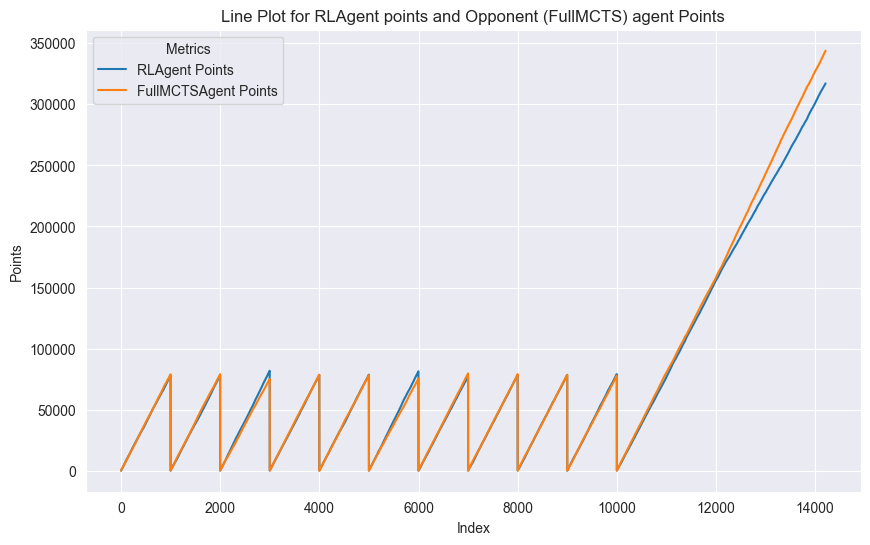

In [325]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x=df.index, y="team_points", label="RLAgent Points")
sns.lineplot(data=df, x=df.index, y="opponent_points", label="FullMCTSAgent Points")

plt.title("Line Plot for RLAgent points and Opponent (FullMCTS) agent Points")
plt.xlabel("Index")
plt.ylabel("Points")
plt.legend(title="Metrics")
plt.grid(True)

plt.show()

In [326]:
# plt.figure(figsize=(10, 6))
# sns.barplot(data=df, x=df.index, y="team_points", label="RLAgent Points")
# 
# plt.title("Line Plot for RLAgent points and Opponent (FullMCTS) agent Points")
# plt.xlabel("Index")
# plt.ylabel("Points")
# plt.legend(title="Metrics")
# plt.grid(True)
# 
# plt.show()

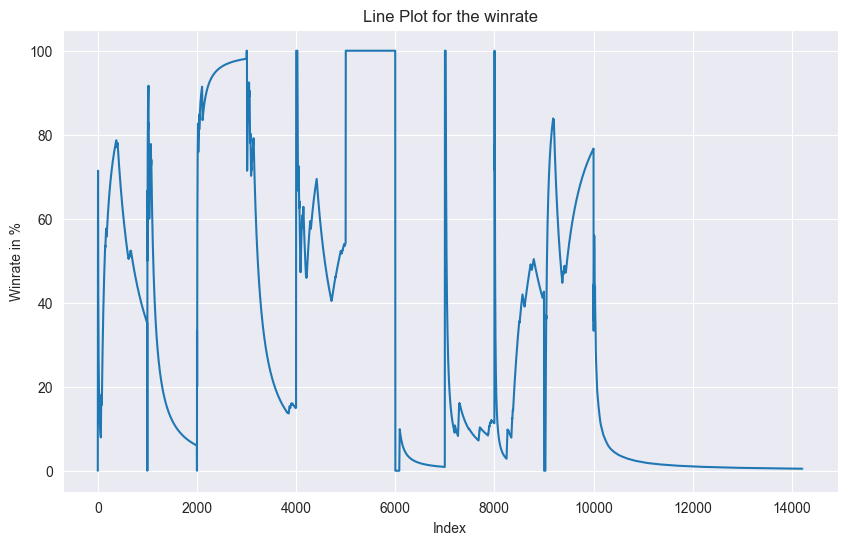

In [327]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x=df.index, y="win_rate")

plt.title("Line Plot for the winrate")
plt.xlabel("Index")
plt.ylabel("Winrate in %")
plt.grid(True)

plt.show()

In [328]:
df.tail(50)

,episode,team_points,opponent_points,win_rate,avg_reward,policy_loss,value_loss,total_loss
14160,4940,313511.0,339766.0,0.485830,-0.009008,-0.688235,0.003138,-0.340980
14161,4941,313562.0,339872.0,0.485732,-0.008968,-0.759716,0.002673,-0.377185
14162,4942,313620.0,339971.0,0.485633,-0.008968,-0.716866,0.006330,-0.352103
14163,4944,313749.0,339999.0,0.485437,-0.008919,-0.731122,0.004262,-0.361299
14164,4948,313906.0,339999.0,0.485044,-0.008867,-0.738011,0.003593,-0.365412
14165,4949,313934.0,340128.0,0.484946,-0.008952,-0.731870,0.002361,-0.363574
14166,4950,314005.0,340214.0,0.484848,-0.008957,-0.672156,0.001995,-0.334083
14167,4952,314095.0,340281.0,0.484653,-0.008879,-0.793680,0.003025,-0.393815
14168,4953,314197.0,340336.0,0.484555,-0.008835,-0.732829,0.003045,-0.363369
14169,4954,314252.0,340438.0,0.484457,-0.008835,-0.784659,0.002322,-0.390007


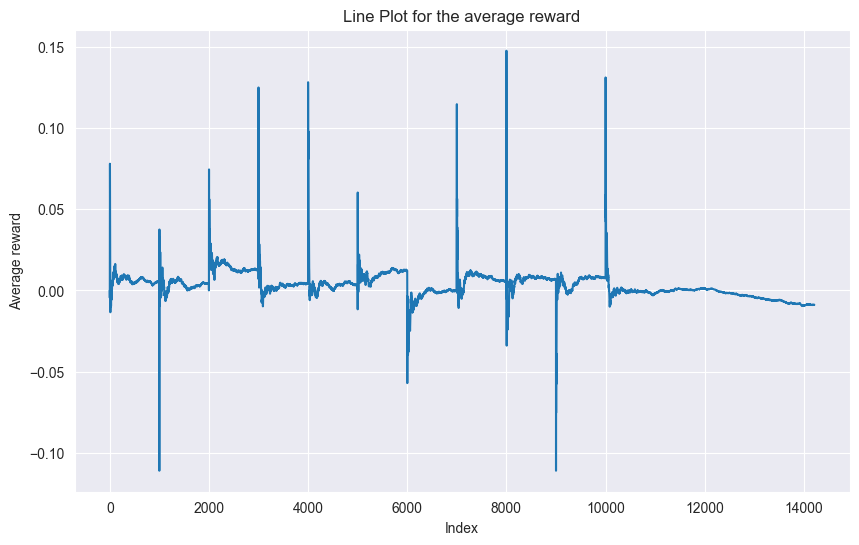

In [329]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x=df.index, y="avg_reward")

plt.title("Line Plot for the average reward")
plt.xlabel("Index")
plt.ylabel("Average reward")
plt.grid(True)

plt.show()

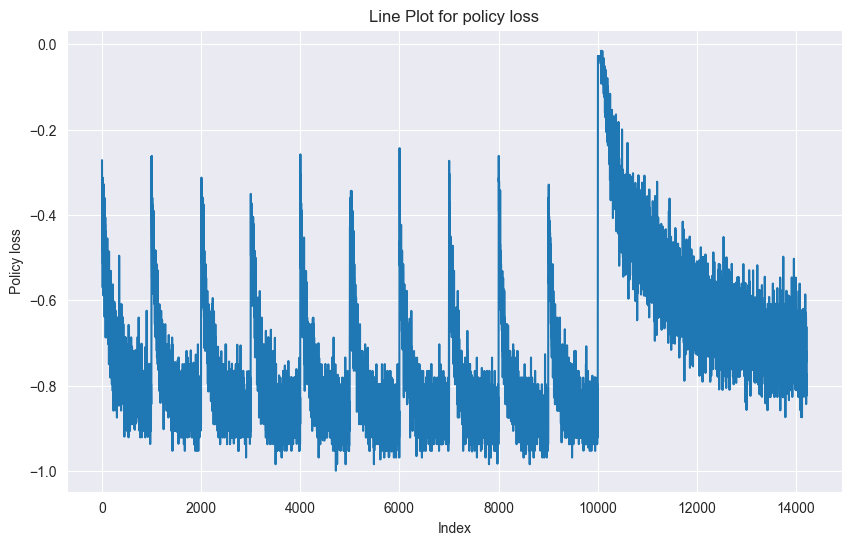

In [330]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x=df.index, y="policy_loss")

plt.title("Line Plot for policy loss")
plt.xlabel("Index")
plt.ylabel("Policy loss")
plt.grid(True)

plt.show()

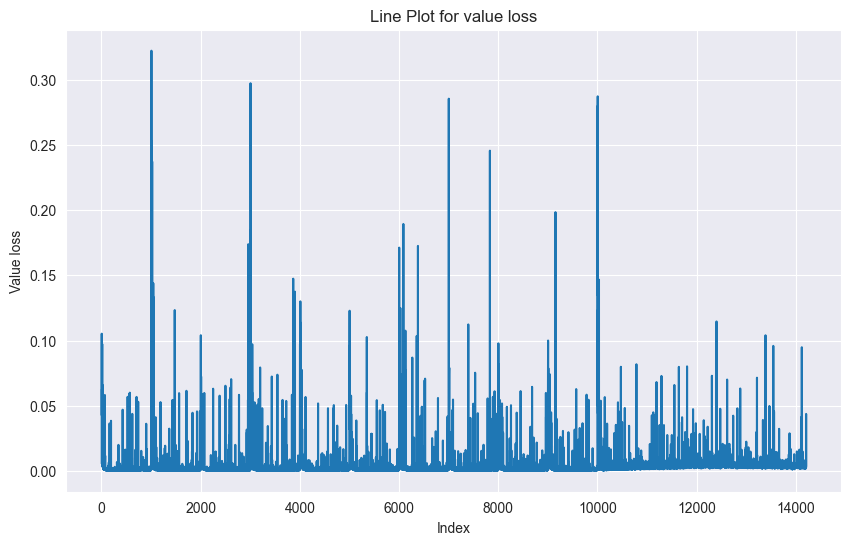

In [331]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x=df.index, y="value_loss")

plt.title("Line Plot for value loss")
plt.xlabel("Index")
plt.ylabel("Value loss")
plt.grid(True)

plt.show()

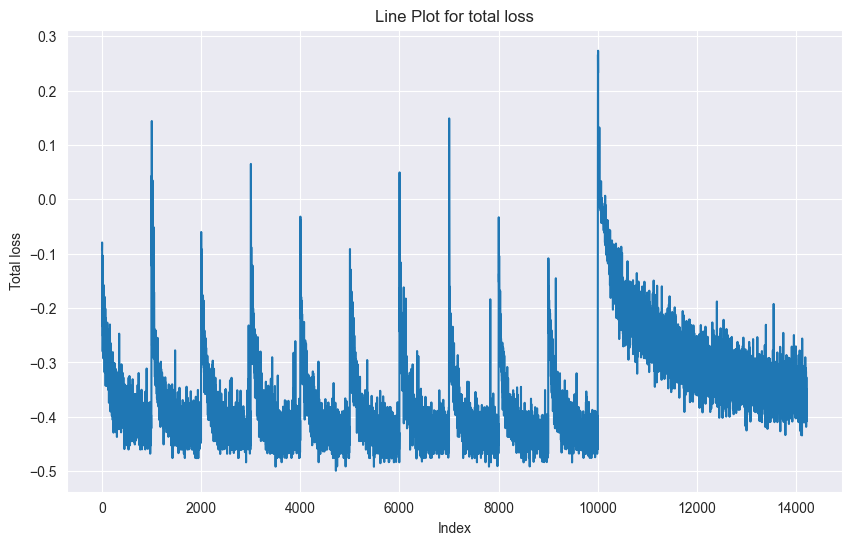

In [332]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x=df.index, y="total_loss")

plt.title("Line Plot for total loss")
plt.xlabel("Index")
plt.ylabel("Total loss")
plt.grid(True)

plt.show()